# Nathaniel Davis

# Intro

I chose violent crimes as my metric. I think violent crimes better portrays a neighborhood's safety than all crimes because this doesn't include things like traffic violations or minor property crimes. I filtered for violent crimes by selecting all crimes where the crime was against a person. This includes things like assault, intimidation, etc. I also chose to normalize the data against neighborhood populations because a bigger neighborhood will naturally have more crimes. By calculating crimes per 1,000 residents, I can fairly compare neighborhoods of different sizes. The formula is: (crimes / population) * 1000.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

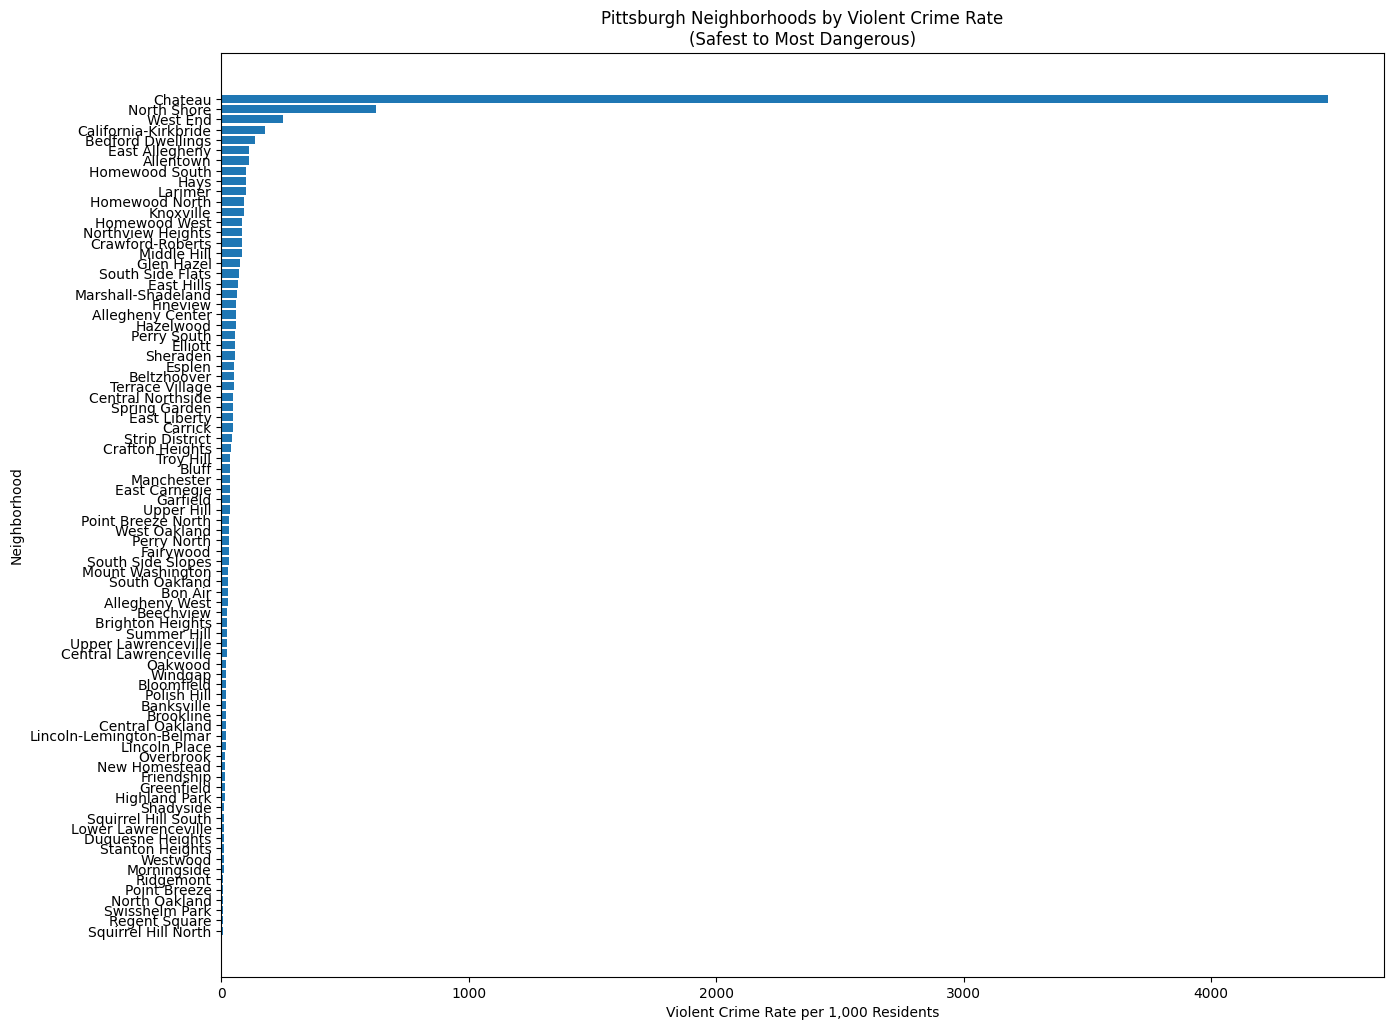

,Neighborhood,Violent_Crime_Count,2020_Total_Population,Rate_per_1000
68,Squirrel Hill North,59,11879,4.966748
60,Regent Square,5,971,5.149331
73,Swisshelm Park,7,1339,5.227782
50,North Oakland,70,10691,6.547563
57,Point Breeze,38,5348,7.105460


In [53]:
# load datasets
crime = pd.read_csv('crime.csv', low_memory=False)
population = pd.read_csv('population.csv')

# filter violent crimes and group by neighborhood
violent_crimes = crime[crime['NIBRS_Crime_Against'] == 'Person']
violent_counts = violent_crimes.groupby('Neighborhood').size().reset_index(name='Violent_Crime_Count')

# merge crimes and population and find rate per 1000
safety = violent_counts.merge(population[['Neighborhood', '2020_Total_Population']], on='Neighborhood')
safety['Rate_per_1000'] = (safety['Violent_Crime_Count'] / safety['2020_Total_Population'] * 1000)

# sort
by_rate = safety.sort_values('Rate_per_1000')

# chart: rate per 1,000
plt.figure(figsize=(15, 12))
plt.barh(by_rate['Neighborhood'], by_rate['Rate_per_1000'])
plt.xlabel('Violent Crime Rate per 1,000 Residents')
plt.ylabel('Neighborhood')
plt.title('Pittsburgh Neighborhoods by Violent Crime Rate\n(Safest to Most Dangerous)')
plt.show()

# show top 5
by_rate.head()

# Narrative

The data shows that Squirrel Hill North has the least amount of violent crimes per 1,000 residents at only around 5. I've been to Squirrel Hill and I can't say I'm too surprised. They have a relatively high population (almost 12,000 people) but they're peaceful enough to stay at number 1.

The top 5 safest neighborhoods are:
1. Squirrel Hill North - 4.97
2. Regent Square - 5.15
3. Swisshelm Park - 5.23
4. North Oakland - 5.51
5. Point Breeze - 7.11

On the opposite end, Chateau is off the charts with over 4,400 crimes per 1,000 residents because their population is only 19 people and they had 85 violent crimes. That's basically a outlier.

# Conclusion

I like Squirrel Hill so I'm glad it ranked number one. I live in North Oakland so I'm happy it got number four overall, but top 3 wouldn't have hurt. Still, being in the top 5 safest neighborhoods is pretty good and it matches how I feel living here.

# Lawrence Aliza

To find the best neighborhood in Pittsburgh, we each looked for data sets that would support our idea of what makes a neighborhood the best. For me, I chose firearm seizures because I believe the safer a neighborhood, the better it is for the community. Firearm seizures for me represent the amount of potential gun violence going on within a community so the higher the seizure rate, the less safe the commmunity.

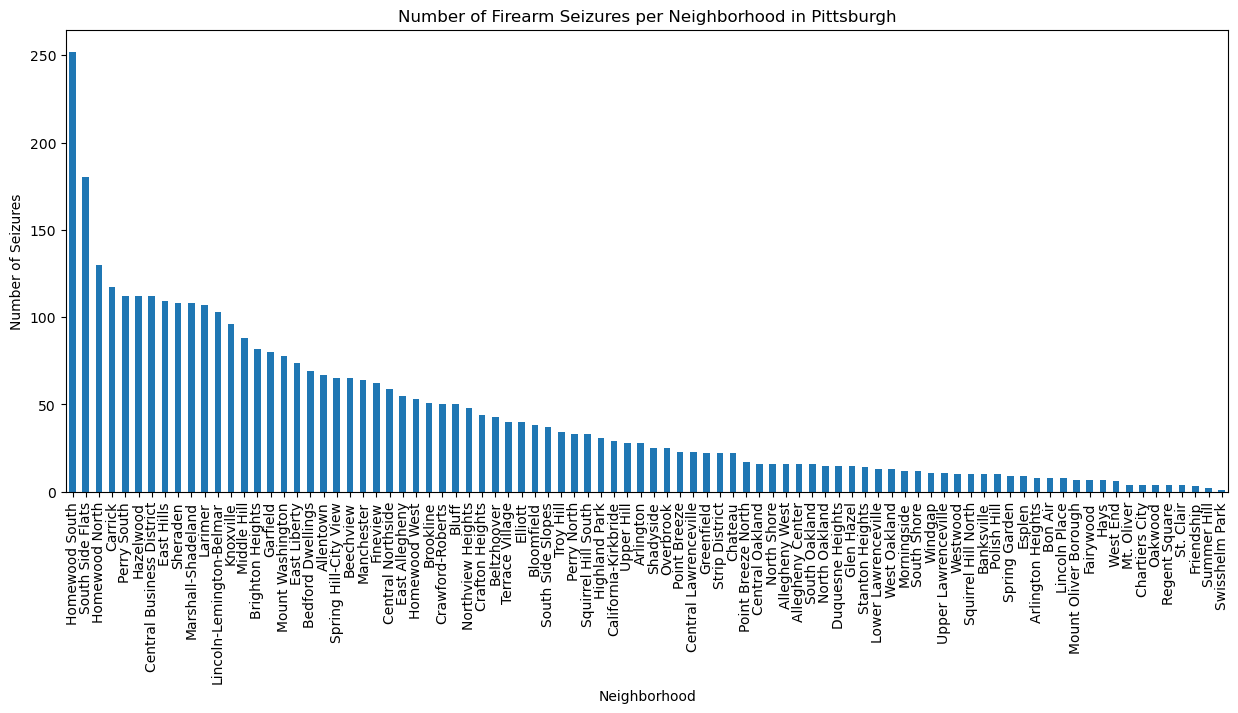

Best neighborhood based on lowest firearm seizures: Swisshelm Park


In [10]:
import pandas as pd

firearm_df = pd.read_csv("firearm.csv")

firearm_df.head()

firearm_df = firearm_df[['total_count', 'neighborhood']]

seizures_by_neighborhood = firearm_df["neighborhood"].value_counts()

import matplotlib.pyplot as plt

seizures_by_neighborhood.plot(kind="bar", figsize=(15,6))
plt.title("Number of Firearm Seizures per Neighborhood in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Seizures")
plt.show()


best_neighborhood = seizures_by_neighborhood.idxmin()
print("Best neighborhood based on lowest firearm seizures:", best_neighborhood)





Based on the results from the Data set the top three best neighborhoods in Pittsburgh are Swisshelm park, Summer Hill, and Sriendship with the lowest firearm seizures. As someone who is not native to Pittsburgh I would not be able to say if I

# Angelo Mariano

In [28]:
#imports all libraries 
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message="Glyph.*missing from font")

try:
    import seaborn as sns
    sns.set(style="whitegrid")
except ImportError:
    pass


In [32]:
#Opens the Arrests dataset
file_path_arrests = "pbp_arrests_2024_jan1_thru_oct31_2025.csv"

try:
    df_arrests = pd.read_csv(file_path_arrests, encoding="ISO-8859-1")
except FileNotFoundError:
    print("Not found")


In [33]:
# Checks all of the columns
print(df_arrests.columns.tolist())

# Detect possible columns
date_col_candidates = [col for col in df_arrests.columns if 'date' in col.lower()]
neighborhood_col_candidates = [col for col in df_arrests.columns if 'neighborhood' in col.lower()]

print("Possible date columns:", date_col_candidates)
print("Possible neighborhood columns:", neighborhood_col_candidates)

# Choose first candidate automatically
date_col = date_col_candidates[0]       # e.g., "ArrestDate"
neighborhood_col = neighborhood_col_candidates[0]  # e.g., "Neighborhood"


['Template', 'Case_Number', 'ArrestPerson_ID', 'Arrest_Date', 'Arrest_Year', 'Arrest_Month', 'Arrest_Time', 'Type', 'ArrestPerson_Age', 'ArrestPerson_Sex', 'ArrestPerson_Race', 'NIBRS_Coded_Offense', 'NIBRS_Offense_Code', 'NIBRS_Offense_Category', 'NIBRS_Offense_Type', 'NIBRS_Crime_Against', 'NIBRS_Offense_Grouping', 'Violation', 'Zone', 'Tract', 'Neighborhood', 'ArrestCharge_Felony_Misdemeanor_Description', 'XCOORD', 'YCOORD', 'Block_Address']
Possible date columns: ['Arrest_Date']
Possible neighborhood columns: ['Neighborhood']


In [34]:
#Cleans all of the data and gets rid of what does not fit or work 
df_arrests = df_arrests.dropna(subset=[date_col, neighborhood_col])

#Change date column to datetime
df_arrests[date_col] = pd.to_datetime(df_arrests[date_col], errors="coerce")
df_arrests = df_arrests.dropna(subset=[date_col])


In [35]:
#Counts all the arrests by neighborhood
arrest_counts = df_arrests[neighborhood_col].value_counts().reset_index()
arrest_counts.columns = [neighborhood_col, "ArrestCount"]


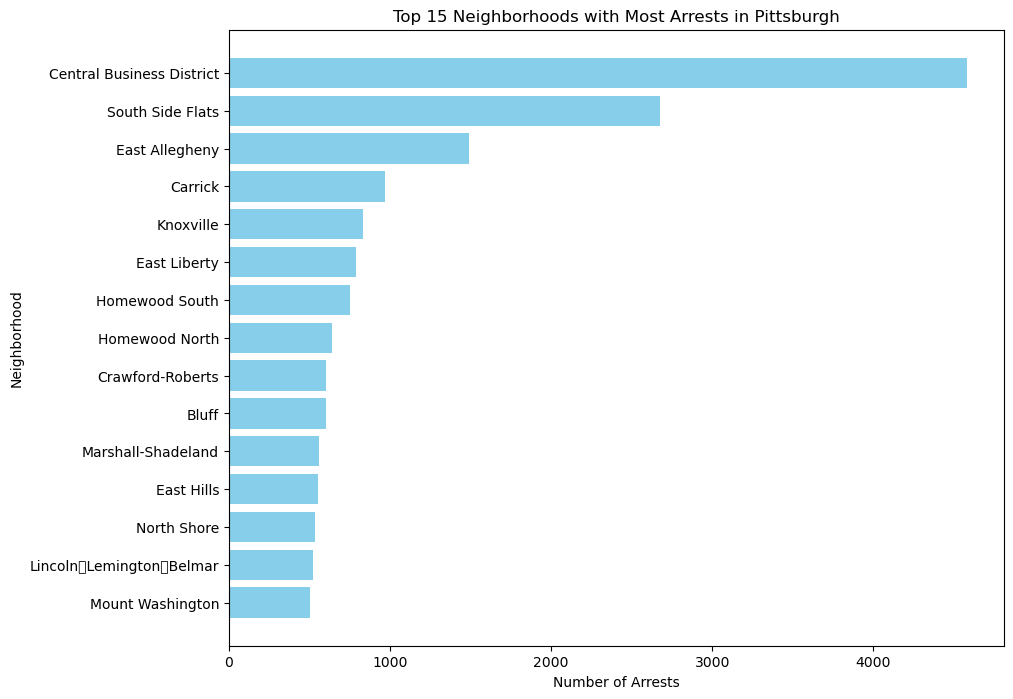

In [36]:
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))
    sns.barplot(data=arrest_counts.head(15), 
                x='ArrestCount', 
                y=neighborhood_col, 
                palette='coolwarm')
    plt.title('Top 15 Neighborhoods with Most Arrests in Pittsburgh')
    plt.xlabel('Number of Arrests')
    plt.ylabel('Neighborhood')
    plt.gca().invert_yaxis()
    plt.show()
except ImportError:
    plt.figure(figsize=(10,8))
    plt.barh(arrest_counts.head(15)[neighborhood_col], 
             arrest_counts.head(15)['ArrestCount'], 
             color='skyblue')
    plt.xlabel('Number of Arrests')
    plt.ylabel('Neighborhood')
    plt.title('Top 15 Neighborhoods with Most Arrests in Pittsburgh')
    plt.gca().invert_yaxis()
    plt.show()


**Conclusion**


Based on the information I looked at, Mount Washington appears to have the best safety in Pittsburgh. Some people could say otherwise based on information outside of just arrests, but the statistics here support it fairly well. This analysis provides a clear, easy-to-read bar graph showing the neighborhoods with the most to least arrests in Pittsburgh. Overall this gives a 

# Nate Kupersmit

Based on the available datasets provdided by the WPRDC I was able to choose Parks as my metric for the best neighborhood in Pittsburgh. I chose the amount of parks to be the best metric because of the implications. More parks In a neighborhood means a more active and safe environment for the children of the community who will grow to be the future of Pittsburgh.

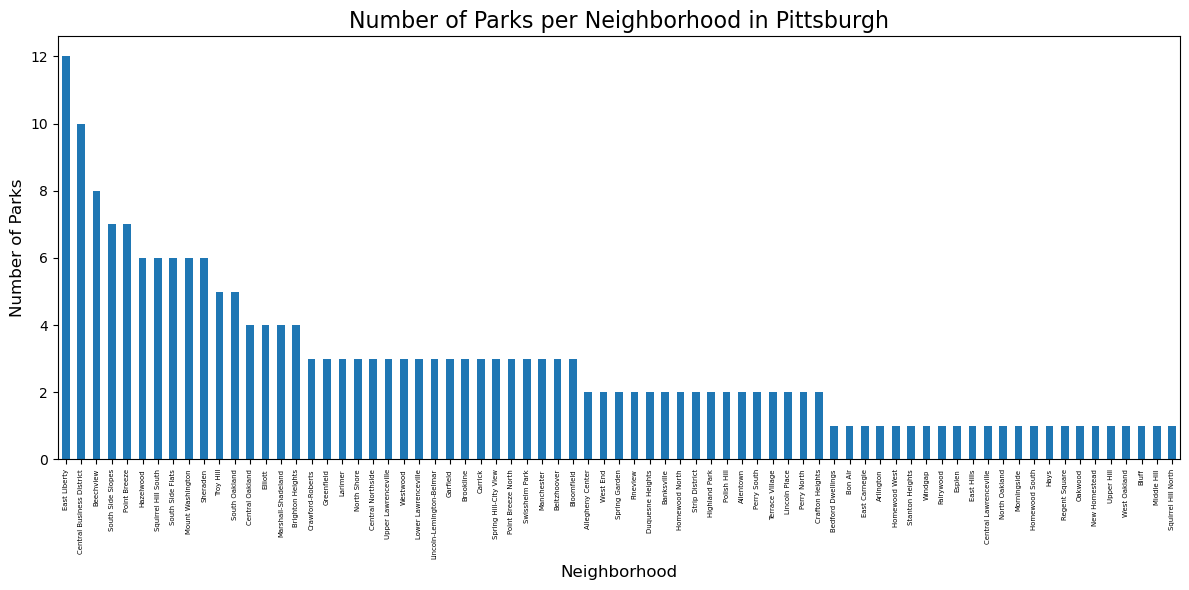

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

# Load the dataset
parks_df = pd.read_csv("parks.csv")

# Count parks per neighborhood
parks_by_neighborhood = parks_df["neighborhood"].value_counts()

parks_by_neighborhood


best_neighborhood = parks_by_neighborhood.idxmax()
best_count = parks_by_neighborhood.max()

best_neighborhood, best_count

plt.figure(figsize=(12,6))
parks_by_neighborhood.plot(kind="bar")

plt.title("Number of Parks per Neighborhood in Pittsburgh", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Parks", fontsize=12)

# Make labels smaller
plt.xticks(fontsize=5, rotation=90)

plt.tight_layout()
plt.show()



Based on the Dataset and the metric I chose the three best neighborhoods are East Liberty, Central Buisness District, and Beechview. I personally am not from Pittsburgh so the data may not perfectly represent the neighborhoods, although this metric is 

# Conclusion

* Squirrel Hill North: 1
* Regent Square: 2
* Swisshelm Park: 2
* North Oakland: 1
* Point Breeze: 2
* St. Clair: 1
* Friendship: 1
* Summer Hill: 1
* Marshall-Shadeland: 1
* East Hills: 1
* North Shore: 1
* Lincoln Lemington Belmar: 1
* Mount Washington: 1
* East Liberty: 1
* Central Business District: 1
* Beechview: 1
* South Side Slopes: 1

Every time a neighborhood was in the top five, we gave them one point. From the data we can see that Regent Square, Swisshelm Park, and Point Breeze are tied for most safe. We used pretty diverse metrics to justify "safety" so that's why there isn't a clear winner. We didn't look at anything like quality of life or hospitals so that's for next time.